<a href="https://colab.research.google.com/github/kevinbui0410/ML4MK/blob/main/Bai_4_Groceries_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Business Understanding**

Dùng nhóm Association Rule Learning để tính toán mức độ kết hợp giữa các item

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:Data Understanding/Acquire**

Data đã được cung cấp trong file ItemList.xlsx


**Step 3: Data prepartion/Prepare**

In [ ]:
path = '/content/drive/My Drive/LDS6_Bui_Thanh_Quang/LDS6_Bui_Thanh_Quang_Thi/'

In [ ]:
data = pd.read_excel(path+'data/ItemList.xlsx',header=None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14963 non-null  object
 1   1       14963 non-null  object
 2   2       4883 non-null   object
 3   3       2185 non-null   object
 4   4       795 non-null    object
 5   5       451 non-null    object
 6   6       276 non-null    object
 7   7       196 non-null    object
 8   8       51 non-null     object
 9   9       1 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 1.3+ MB


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Bộ dữ liệu lớn, gần 15000 rows => chọn apriori để nhóm dữ liệu**

In [ ]:
records = []
for i in range(0, data.shape[0]):
  records.append([str(data.values[i,j]) for j in range(0,data.shape[1])])

In [ ]:
records[0]

['sausage',
 'whole milk',
 'semi-finished bread',
 'yogurt',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.shape

(14963, 168)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Columns: 168 entries, Instant food products to zwieback
dtypes: bool(168)
memory usage: 2.4 MB


In [ ]:
df = df.drop('nan',axis=1)

In [ ]:
df.shape

(14963, 167)

In [ ]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Áp dụng mô hình**

In [ ]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True) 
# dat nguong min_support=0.001 , nghia la chi chon nhung san pham nao co ty le giao dich tu 0.001 tro len
frequent_itemsets

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
745,0.001136,"(rolls/buns, whole milk, sausage)"
746,0.001002,"(rolls/buns, soda, whole milk)"
747,0.001337,"(rolls/buns, whole milk, yogurt)"
748,0.001069,"(sausage, soda, whole milk)"


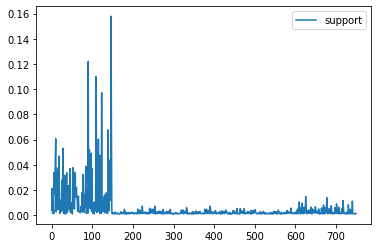

In [ ]:
frequent_itemsets.plot.line()

**Tỷ lệ dao động từ 0.01 đến 0.16, trong đó nhóm có tỷ lệ cao nằm trong khoảng 150 nhóm đầu trong bộ item**

In [ ]:
frequent_itemsets[:150]['itemsets']

0        (Instant food products)
1                     (UHT-milk)
2             (abrasive cleaner)
3             (artif. sweetener)
4                (baking powder)
                 ...            
145                 (white wine)
146                 (whole milk)
147                     (yogurt)
148                   (zwieback)
149    (UHT-milk, bottled water)
Name: itemsets, Length: 150, dtype: object

**Tìm qui luật kết hợp**

In [ ]:
from mlxtend.frequent_patterns import association_rules
df_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
df_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
1,(UHT-milk),(whole milk),0.021386,0.157923,0.002540,0.118750,0.751949,-0.000838,0.955549
2,(beef),(whole milk),0.033950,0.157923,0.004678,0.137795,0.872548,-0.000683,0.976656
3,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,0.000013,1.000682
4,(berries),(whole milk),0.021787,0.157923,0.002272,0.104294,0.660414,-0.001168,0.940127
...,...,...,...,...,...,...,...,...,...
125,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
126,"(sausage, whole milk)",(soda),0.008955,0.097106,0.001069,0.119403,1.229612,0.000200,1.025320
127,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
128,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541


**Danh sách các item kết hợp với sausage**

In [ ]:
for row in df_rules.iterrows():
  if "sausage" in row[1][0]:
    print(row)

(98, antecedents              (sausage)
consequents           (whole milk)
antecedent support       0.0603489
consequent support        0.157923
support                 0.00895542
confidence                0.148394
lift                      0.939663
leverage              -0.000575042
conviction                0.988811
Name: 98, dtype: object)
(120, antecedents           (rolls/buns, sausage)
consequents                    (whole milk)
antecedent support               0.00534652
consequent support                 0.157923
support                          0.00113614
confidence                           0.2125
lift                                1.34559
leverage                        0.000291798
conviction                           1.0693
Name: 120, dtype: object)
(121, antecedents           (whole milk, sausage)
consequents                    (rolls/buns)
antecedent support               0.00895542
consequent support                 0.110005
support                          0.00113614
c

**Danh sách 15 sản phẩm được mua nhiều nhất**

In [ ]:
df_max_15 = frequent_itemsets.sort_values('support',ascending=False)[:15]
df_max_15

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
110,0.069572,(root vegetables)
139,0.067767,(tropical fruit)
10,0.060683,(bottled water)
115,0.060349,(sausage)
28,0.053131,(citrus fruit)


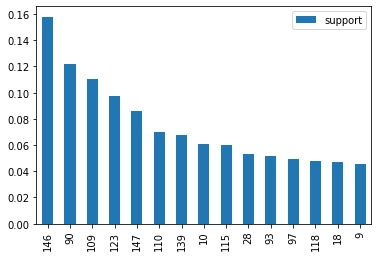

In [ ]:
df_max_15.plot.bar()

**Danh sách 15 sản phẩm được mua ít nhất**

In [ ]:
df_min_15 = frequent_itemsets.sort_values('support',ascending=True)[:15]
df_min_15

,support,itemsets
201,0.001002,"(bottled beer, chicken)"
692,0.001002,"(tropical fruit, salty snack)"
533,0.001002,"(hygiene articles, root vegetables)"
405,0.001002,"(cream cheese, frankfurter)"
349,0.001002,"(root vegetables, chicken)"
34,0.001002,(cooking chocolate)
455,0.001002,"(domestic eggs, white bread)"
440,0.001002,"(rolls/buns, detergent)"
368,0.001002,"(cream cheese, citrus fruit)"
670,0.001002,"(rolls/buns, soft cheese)"


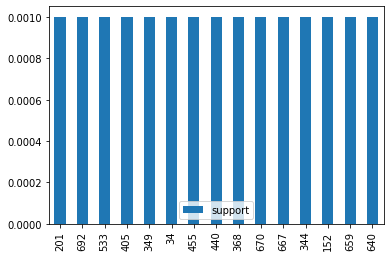

In [ ]:
df_min_15.plot.bar()